In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
import keras
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from zipfile import ZipFile

In [3]:
with ZipFile("/content/drive/MyDrive/archive.zip" , 'r') as ob:
  ob.extractall("/content/dataset")

In [71]:
train_dir = r"/content/dataset/training_set/training_set"
test_dir  = r"/content/dataset/test_set/test_set"

In [72]:
img_width=128
img_height=128
img_size=(128,128)
img_channels=3

In [73]:
train_data= ImageDataGenerator(rotation_range=15,rescale=1/255,shear_range=0.1,
                               zoom_range=0.2,horizontal_flip=True,
                               width_shift_range=0.1,
                                height_shift_range=0.1)
test_data=  ImageDataGenerator(rotation_range=15,rescale=1/255,shear_range=0.1,
                              zoom_range=0.2,horizontal_flip=True,
                              width_shift_range=0.1,height_shift_range=0.1)

In [74]:
train_set=      train_data.flow_from_directory(directory=train_dir,target_size=(128,128),batch_size = 15,class_mode='categorical')
validation_set= test_data.flow_from_directory(directory=test_dir,target_size=(128,128),batch_size = 15,class_mode='categorical')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [75]:
validation_set.class_indices

{'cats': 0, 'dogs': 1}

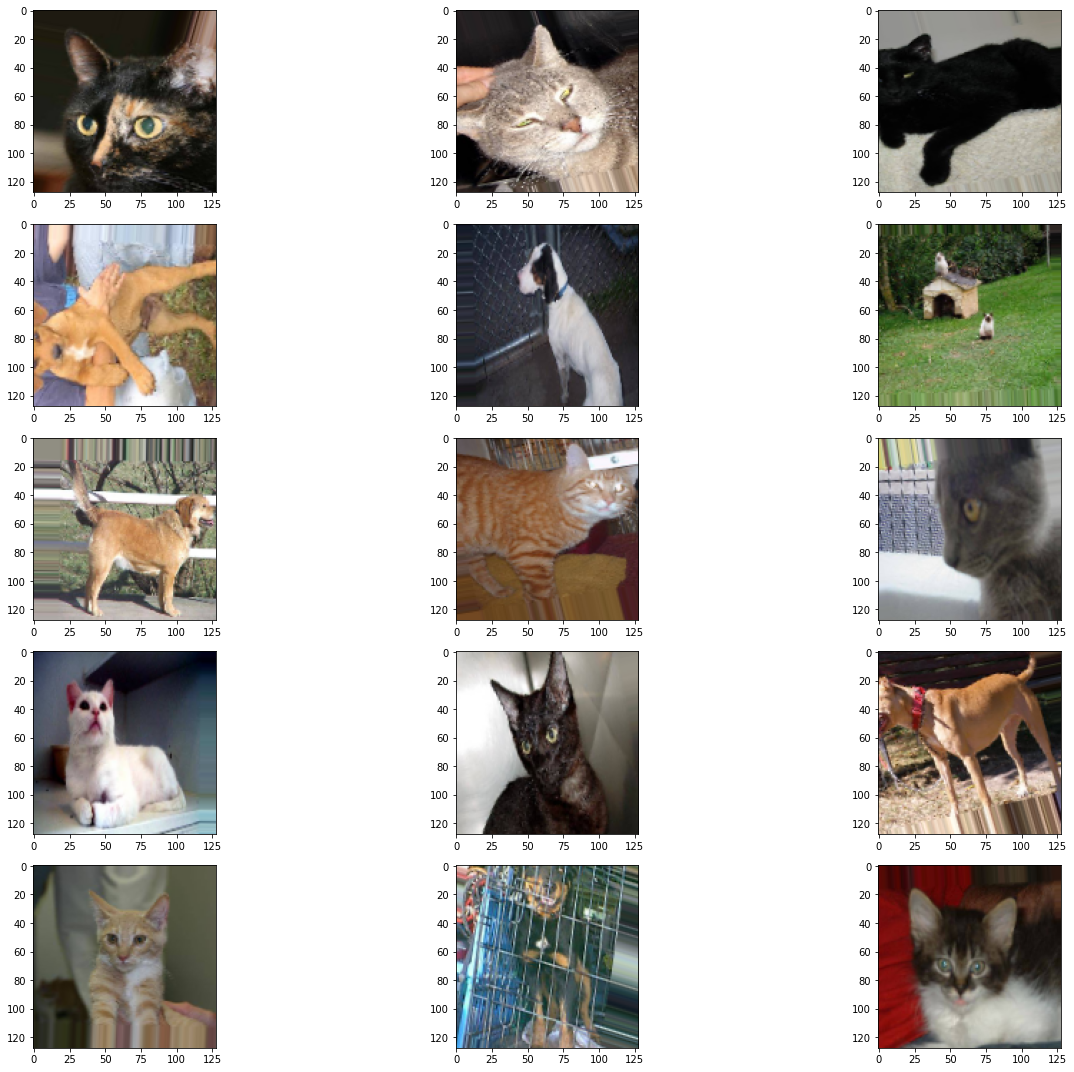

In [76]:
plt.figure(figsize=(20,15))
for i in range(0,15):
  plt.subplot(5, 3, i+1 )
  for img in next(train_set):
    image= img[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show() 

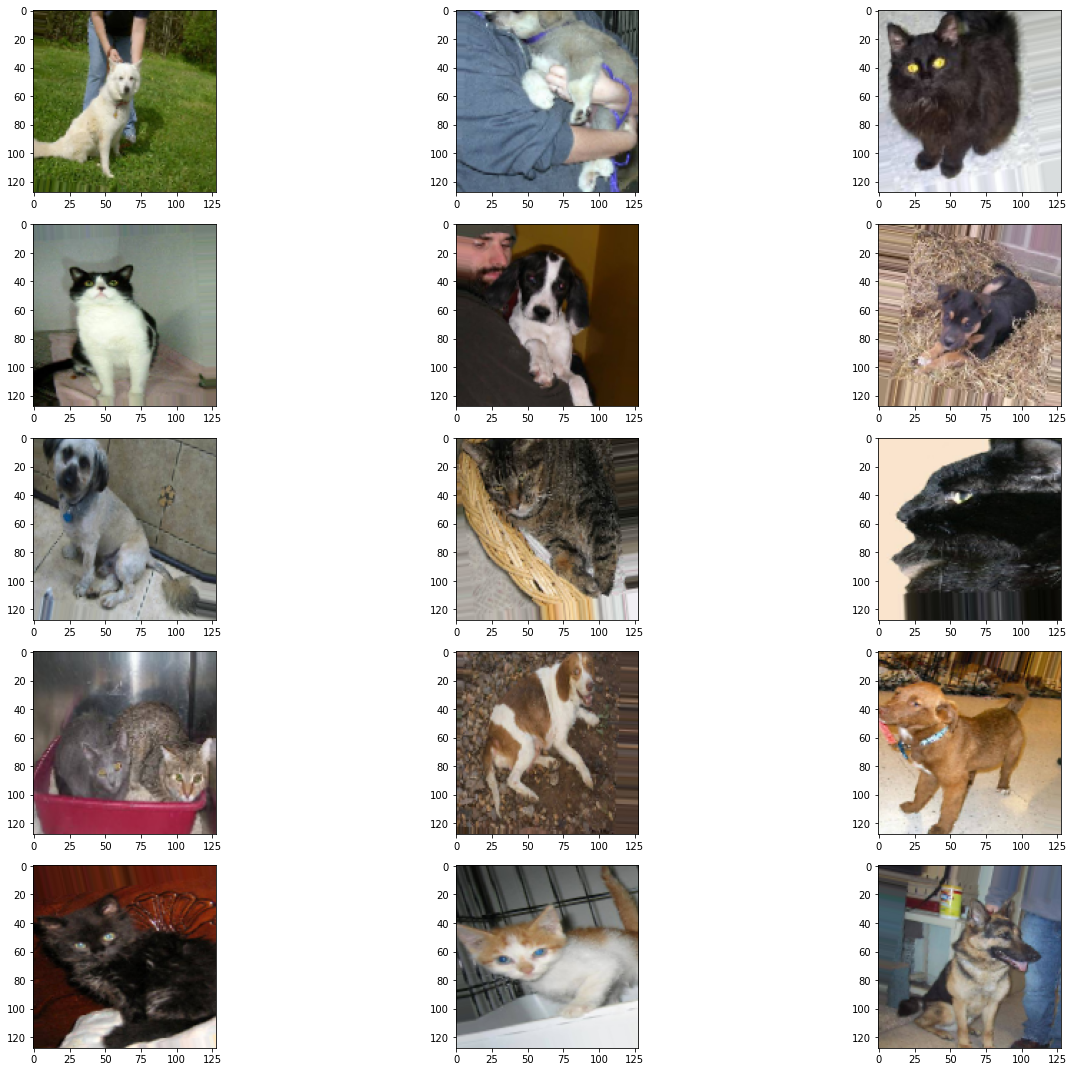

In [77]:
plt.figure(figsize=(20,15))
for i in range(0,15):
  plt.subplot(5, 3, i+1 )
  for img in next(train_set):
    image= img[1]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show() 

In [78]:
|model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

SyntaxError: ignored

In [ ]:
model.summary() 

In [ ]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
TrainClasses = train_set.class_indices

ResultMap ={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
  ResultMap[faceValue]=faceName


#Saving the face map for future reference
import pickle
with open("ResultMap.pkl", 'wb') as filesWriteStream:
    pickle.dump(ResultMap , filesWriteStream)

#The model will give as a numeric tag
#This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)

#The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of OUtput Neurons:',OutputNeurons)

In [81]:
final_train_set = 8005
final_validation_set = 2023
batch_size = 15
no_epochs  = 20

In [82]:
model.fit_generator(train_set, epochs=no_epochs,validation_data =validation_set,
                    steps_per_epoch= final_train_set//batch_size, validation_steps=final_validation_set//batch_size ) 

Epoch 1/20
533/533 [==============================] - 60s 112ms/step - loss: 0.8387 - accuracy: 0.5982 - val_loss: 0.7874 - val_accuracy: 0.5547
Epoch 2/20
533/533 [==============================] - 59s 111ms/step - loss: 0.6632 - accuracy: 0.6404 - val_loss: 0.6271 - val_accuracy: 0.6642
Epoch 3/20
533/533 [==============================] - 59s 111ms/step - loss: 0.6341 - accuracy: 0.6502 - val_loss: 0.6188 - val_accuracy: 0.6637
Epoch 4/20
533/533 [==============================] - 60s 113ms/step - loss: 0.6273 - accuracy: 0.6630 - val_loss: 0.7166 - val_accuracy: 0.5766
Epoch 5/20
533/533 [==============================] - 59s 111ms/step - loss: 0.6093 - accuracy: 0.6726 - val_loss: 0.7112 - val_accuracy: 0.5935
Epoch 6/20
533/533 [==============================] - 59s 111ms/step - loss: 0.5938 - accuracy: 0.6950 - val_loss: 0.5567 - val_accuracy: 0.7124
Epoch 7/20
533/533 [==============================] - 59s 110ms/step - loss: 0.5651 - accuracy: 0.7093 - val_loss: 0.6589 - val_ac

In [83]:
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array

Testing Image of CAT


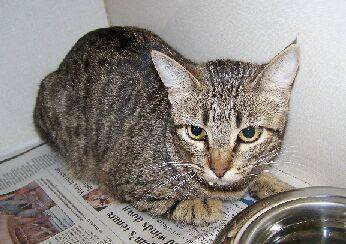

In [84]:
ImagePath='/content/animal (8).jpg'
test_image=keras.utils.load_img(ImagePath, target_size=(128,128))
test_image=keras.utils.img_to_array(test_image)

# import the cv2 library
import cv2
from google.colab.patches import cv2_imshow
 
# The function cv2.imread() is used to read an image.
img= cv2.imread('/content/animal (8).jpg',1)
 
# The function cv2.imshow() is used to display an image in a window.
print('Testing Image of CAT')
cv2_imshow(img)
 
# waitKey() waits for a key press to close the window and 0 specifies indefinite loop
#cv2.waitKey(0)
 
# cv2.destroyAllWindows() simply destroys all the windows we created.
#cv2.destroyAllWindows()

In [85]:
test_image=np.expand_dims(test_image,axis=0)

In [86]:
result = model.predict_generator(test_image,verbose=0)

In [87]:
print('Prediction is',ResultMap[np.argmax(result)])

Prediction is cats
